In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
import scipy
import voronoi_utility
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import pandas
import math

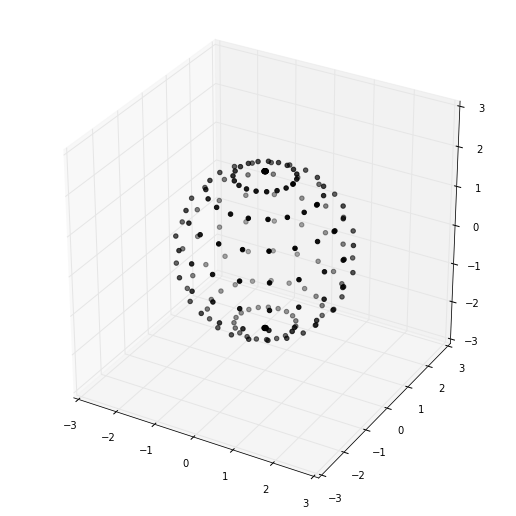

In [28]:
#for testing, produce a mesh of points on a sphere:
circumdiameter = 4.0
u, v = numpy.mgrid[0.01:2*numpy.pi-0.01:20j, 0.01:numpy.pi-0.01:10j]
x=circumdiameter/2.0 * (numpy.cos(u)*numpy.sin(v))
y=circumdiameter/2.0 * (numpy.sin(u)*numpy.sin(v))
z=circumdiameter/2.0 * (numpy.cos(v))
#and plot the points to confirm spherical shape by visual inspection:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
#ax1.plot_wireframe(x, y, z, color='r',alpha=0.5)
ax1.scatter(x.ravel(),y.ravel(),z.ravel(),c='k')
fig.set_size_inches(9.0,9.0)


In [29]:
#now, let's see if the Delaunay Triangulation from my code looks sensible or even works at all:
input_sphere_coordinate_array = numpy.zeros((200,3))
input_sphere_coordinate_array[...,0] = x.ravel()
input_sphere_coordinate_array[...,1] = y.ravel()
input_sphere_coordinate_array[...,2] = z.ravel()
voronoi_instance = voronoi_utility.Voronoi_Sphere_Surface(input_sphere_coordinate_array)


In [30]:
Delaunay_point_array = voronoi_instance.delaunay_triangulation_spherical_surface()

In [31]:
Delaunay_point_array.shape,x.ravel().shape

((396, 3, 3), (200,))

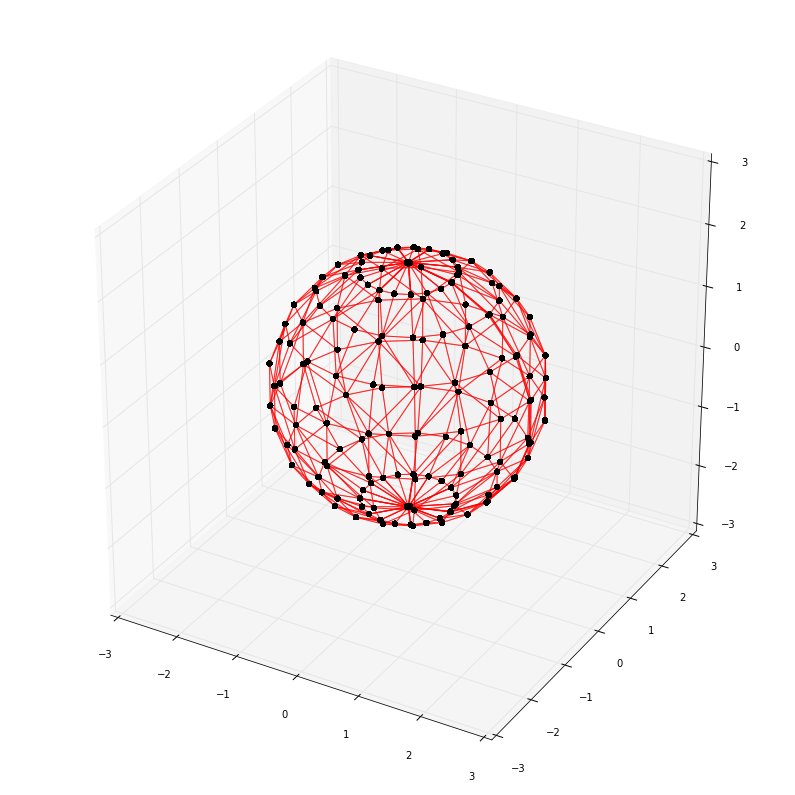

In [33]:
#try to plot the triangles of the Delaunay tesselation to see if they look reasonable by visual inspection relative to the data points:
fig2 = plt.figure()
fig2.set_size_inches(14,14)
ax = fig2.add_subplot(111, projection='3d')
for triangle_coordinate_array in Delaunay_point_array:
    #plot the Delaunay edges in red--using separate calls to close the triangles
    ax.plot(triangle_coordinate_array[...,0],triangle_coordinate_array[...,1],triangle_coordinate_array[...,2],c='r',alpha=0.6)
    connecting_array = numpy.delete(triangle_coordinate_array,1,0)
    ax.plot(connecting_array[...,0],connecting_array[...,1],connecting_array[...,2],c='r',alpha=0.6)
    ax.scatter(x.ravel(),y.ravel(),z.ravel(),c='k') #the original data points in black
    

The above Delaunay triangulation looks reasonable by visual inspection, although specific observations are rather confounded by the 3D perspective (triangle stacking).

In [7]:
#testing 
array_facet_normals = voronoi_instance.Voronoi_vertices_spherical_surface()


AttributeError: Voronoi_Sphere_Surface instance has no attribute 'Voronoi_vertices_spherical_surface'

In [8]:
array_facet_normals

NameError: name 'array_facet_normals' is not defined

In [9]:
generator_Voronoi_region_dictionary,dictionary_sorted_Voronoi_point_coordinates_for_each_generator = voronoi_instance.Voronoi_polygons_spherical_surface()

AttributeError: Voronoi_Sphere_Surface instance has no attribute 'Voronoi_polygons_spherical_surface'

In [10]:
dictionary_sorted_Voronoi_point_coordinates_for_each_generator

NameError: name 'dictionary_sorted_Voronoi_point_coordinates_for_each_generator' is not defined

NameError: name 'dictionary_sorted_Voronoi_point_coordinates_for_each_generator' is not defined

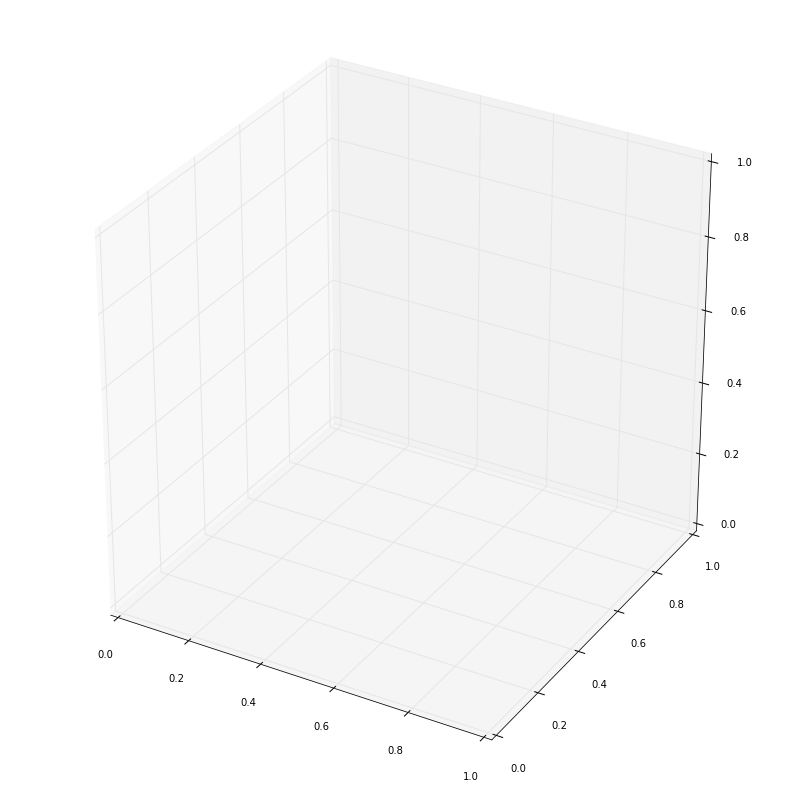

In [11]:
#plot the results
import matplotlib.colors as colors
fig3 = plt.figure()
fig3.set_size_inches(14,14)
ax = fig3.add_subplot(111, projection='3d')
#colour each Voronoi region and generator point randomly to increase confidence in the results (i.e., in the connection between generators and their Voronoi regions assigned by my code)
for generator_index,voronoi_polygon_vertices in dictionary_sorted_Voronoi_point_coordinates_for_each_generator.iteritems():    
    random_color = colors.rgb2hex(scipy.rand(3))
    generator_coordinate = input_sphere_coordinate_array[generator_index]
    ax.scatter(generator_coordinate[...,0],generator_coordinate[...,1],generator_coordinate[...,2],facecolor=random_color,lw=0,s=20,)
    ax.plot(voronoi_polygon_vertices[...,0],voronoi_polygon_vertices[...,1],voronoi_polygon_vertices[...,2],c='black')
    #want to close the polygons as well
    connecting_vertex_array = numpy.vstack((voronoi_polygon_vertices[0,...],voronoi_polygon_vertices[-1,...]))
    ax.plot(connecting_vertex_array[...,0],connecting_vertex_array[...,1],connecting_vertex_array[...,2],c='black')
    polygon = Poly3DCollection([voronoi_polygon_vertices],alpha=0.6)
    polygon.set_color(random_color)
    ax.add_collection3d(polygon)
ax.set_ylim(-2,2)     
ax.set_xlim(-2,2)     
ax.set_zlim(-2,2)     
#ax.scatter(array_facet_normals[...,0],array_facet_normals[...,1],array_facet_normals[...,2],c='blue') #should be Voronoi vertices when working properly and multiplied by correct factor    

So, the above result for a *regular* point grid on a sphere actually looks reasonable now. It would be useful to perform a similar visual test using a random distribution of points on a sphere.

In [6]:
#generate a random distribution of points on the unit sphere (http://mathworld.wolfram.com/SpherePointPicking.html)
import numpy.random
#go for 1000 random points
u = numpy.random.random((200,)) #200 points on interval [0,1); ideally want (0,1), but perhaps close enough?
v = numpy.random.random((200,))
theta_array = 2 * math.pi * u
phi_array = numpy.arccos((2*v - 1.0))
r_array = numpy.ones((200,))
spherical_polar_coord_array = numpy.column_stack((r_array,theta_array,phi_array))
#convert to Cartesian coordinates
cartesian_coord_array = voronoi_utility.convert_spherical_array_to_cartesian_array(spherical_polar_coord_array)

(-1, 1)

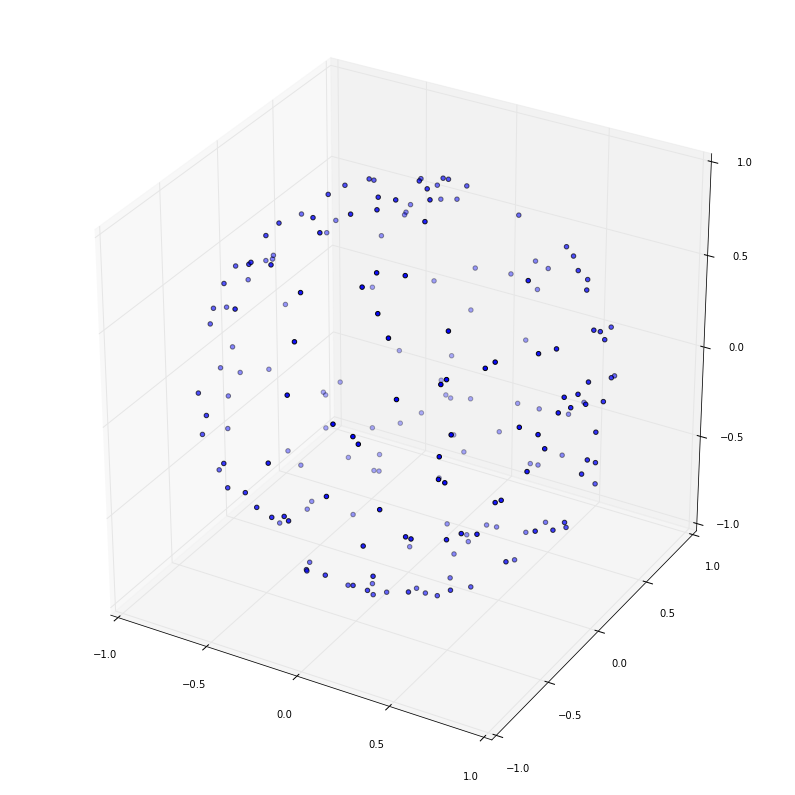

In [7]:
#test plot the random points on unit sphere
fig4 = plt.figure()
fig4.set_size_inches(14,14)
ax = fig4.add_subplot(111, projection='3d')
ax.scatter(cartesian_coord_array[...,0],cartesian_coord_array[...,1],cartesian_coord_array[...,2])
ax.set_ylim(-1,1)     
ax.set_xlim(-1,1)     
ax.set_zlim(-1,1)     


In [8]:
#Not entirely convinced I got a true random distribution there (still have pole bias?!), but should be random enough to test with my code
random_dist_voronoi_instance = voronoi_utility.Voronoi_Sphere_Surface(cartesian_coord_array)

In [9]:
random_dictionary_sorted_Voronoi_point_coordinates_for_each_generator = random_dist_voronoi_instance.voronoi_region_vertices_spherical_surface()

AssertionError: By definition, a Voronoi vertex must be equidistant to at least 3 generators, but in this case only got 1 generators for Voronoi vertex at [ 0.98010214 -0.18930604 -0.05969096], which has 10 closest distances: [ 0.113  0.124  0.221  0.229  0.252  0.299  0.306  0.309  0.324  0.332].

NameError: name 'random_dictionary_sorted_Voronoi_point_coordinates_for_each_generator' is not defined

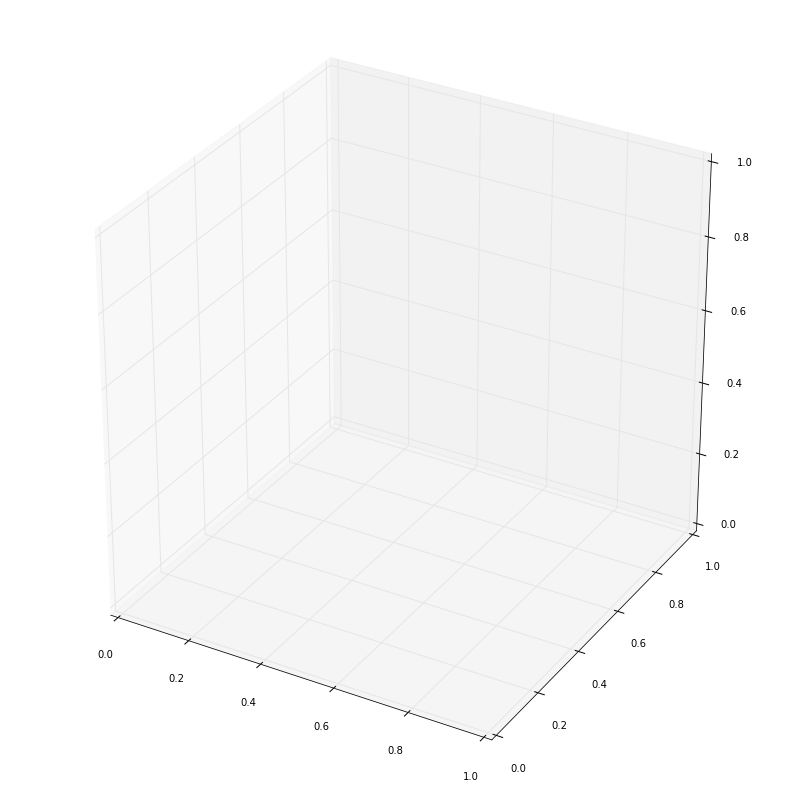

In [16]:
#plot the results
import matplotlib.colors as colors
fig5 = plt.figure()
fig5.set_size_inches(14,14)
ax = fig5.add_subplot(111, projection='3d')
for generator_index,voronoi_polygon_vertices in random_dictionary_sorted_Voronoi_point_coordinates_for_each_generator.iteritems():    
    random_color = colors.rgb2hex(scipy.rand(3))
    generator_coordinate = cartesian_coord_array[generator_index]
    #ax.scatter(generator_coordinate[...,0],generator_coordinate[...,1],generator_coordinate[...,2],facecolor=random_color,lw=0,s=50,)
    ax.plot(voronoi_polygon_vertices[...,0],voronoi_polygon_vertices[...,1],voronoi_polygon_vertices[...,2],c='black')
    #want to close the polygons as well
    connecting_vertex_array = numpy.vstack((voronoi_polygon_vertices[0,...],voronoi_polygon_vertices[-1,...]))
    ax.plot(connecting_vertex_array[...,0],connecting_vertex_array[...,1],connecting_vertex_array[...,2],c='black')
    polygon = Poly3DCollection([voronoi_polygon_vertices],alpha=1.0)
    polygon.set_color(random_color)
    ax.add_collection3d(polygon)
ax.set_ylim(-1,1)     
ax.set_xlim(-1,1)     
ax.set_zlim(-1,1)     

I played with the presence / absence of the generators and the fill alpha values in the above plot. Considering the risk of ultra-close generators with randomly generated data, I'd say these results look *excellent* for a less regular data set.

In [202]:
#some rough work to generate image files for upcoming Dengue Club presentation slide:
fig3.set_size_inches(4,4)
fig5.set_size_inches(4,4)
ax3 = fig3.gca()
ax3.set_xticks([-2,0,2])
ax3.set_yticks([-2,0,2])
ax3.set_zticks([-2,0,2])
ax5 = fig5.gca()
ax5.set_xticks([-1,0,1])
ax5.set_yticks([-1,0,1])
ax5.set_zticks([-1,0,1])
fig3.savefig('regular_points_test.png',dpi=300)
fig5.savefig('random_points_test.png',dpi=300)

In [56]:
#I now want to attempt to reconstitute (sum up) the surface areas of the Voronoi polygons to see if this matches the actual surface area of the sphere
#for the surface area of an arbitrary spherical polygon: http://mathworld.wolfram.com/SphericalPolygon.html
unit_circle_great_arc_array = numpy.array([[-1,0,0],[0,1,0]])    
unit_circle_great_arc_array_deriv_slope_one = numpy.array([[-1,0,0],[-math.sqrt(0.5),math.sqrt(0.5),0]])

In [59]:
derivative_vector_3D = voronoi_utility.calculate_derivative_great_circle_arc_specified_point(unit_circle_great_arc_array_deriv_slope_one,1.0)
derivative_vector_3D

array([[ -7.07350915e-01,   7.06862563e-01,   6.12323400e-17],
       [ -7.07106781e-01,   7.07106781e-01,   0.00000000e+00]])

In [60]:
numpy.diff(derivative_vector_3D,axis=0)

array([[  2.44133372e-04,   2.44217690e-04,  -6.12323400e-17]])

In [3]:
#problematic_polygon_array = numpy.array([[-0.70041688,  0.07294857, -0.70993082],
#[-0.78297057 ,-0.03756652 ,-0.62084854],
 #[-0.77464149 ,-0.07389853 ,-0.62799413],
 #[-0.65546009 ,-0.19355067 ,-0.72994334],
 #[-0.62186187 ,-0.14154995 ,-0.77016783]])
problematic_polygon_array = numpy.array([[-0.12278101, 0.38828208, 0.90397089],
 [-0.18533492 ,0.28384049, 0.9317119 ],
 [ 0.07210294 ,0.29806975, 0.94284522],
 [ 0.1316095  ,0.32464041, 0.92751769]])
 #[ 0.08298007 ,0.36485282 ,0.91814936]])

NameError: name 'final_subtriangle' is not defined

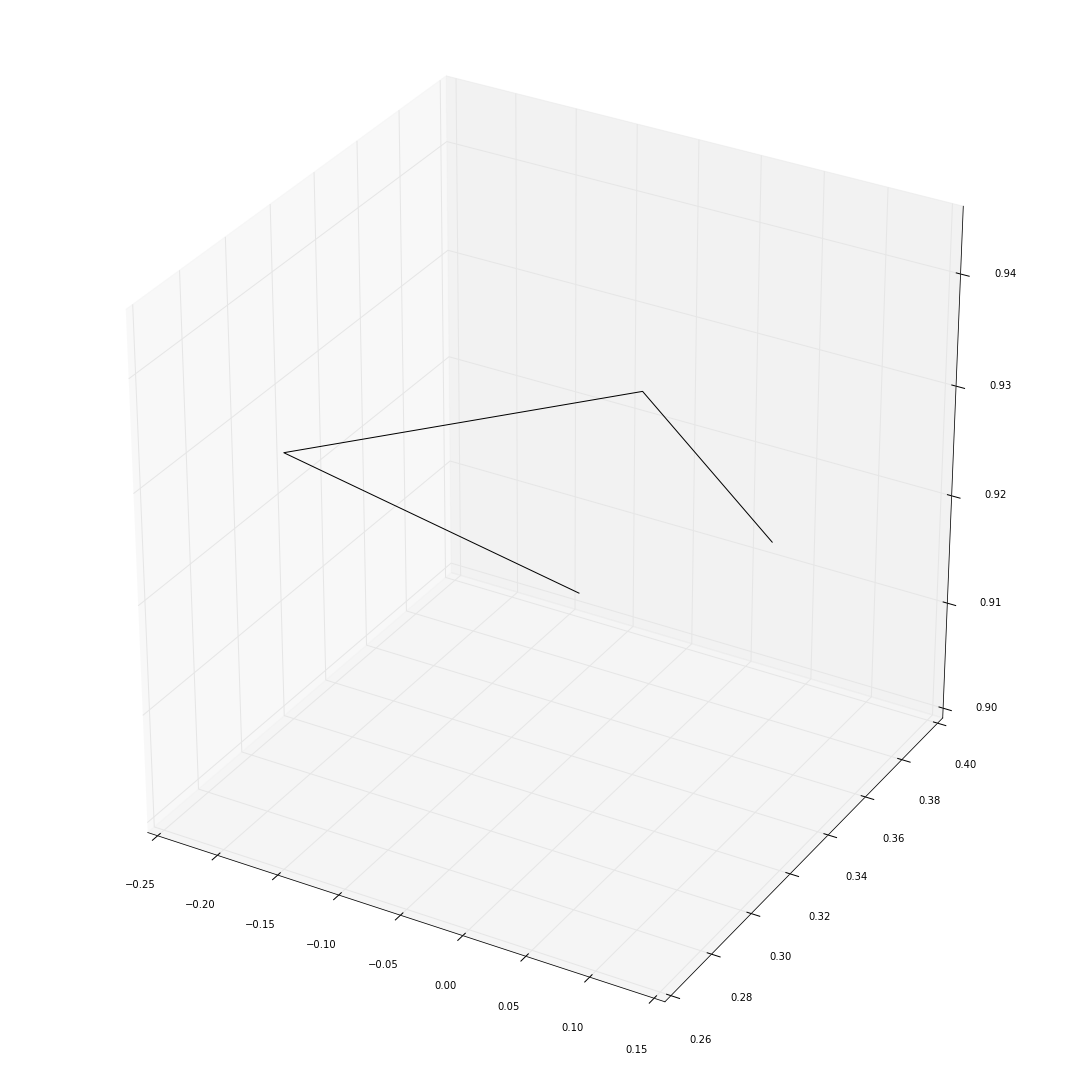

In [5]:
fig6 = plt.figure()
fig6.set_size_inches(19,19)
ax = fig6.add_subplot(111, projection='3d')
ax.scatter(problematic_polygon_array[...,0],problematic_polygon_array[...,1],problematic_polygon_array[...,2],color='None',s=60)
ax.plot(problematic_polygon_array[...,0],problematic_polygon_array[...,1],problematic_polygon_array[...,2],color='black')
#ax.scatter(cartesian_coord_array[...,0],cartesian_coord_array[...,1],cartesian_coord_array[...,2],alpha=0.1) #original generators
ax.plot(final_subtriangle[...,0],final_subtriangle[...,1],final_subtriangle[...,2],c='green') #the final subtriangle (which I think produces an unreasonably small angle??)
#colour vertices progressively so I'm certain where they start / end:
color_list = ['black','brown','blue','yellow']
index = 0
for vertex in problematic_polygon_array:
    color = color_list[index]
    ax.scatter(vertex[...,0],vertex[...,1],vertex[...,2],color=color,s=80)
    index += 1
ax.elev = 0.
#testing lat / lon conventions for comparison with JPL document
cartesian_coord = numpy.array([[0,0,1]])
ax.scatter(cartesian_coord[...,0],cartesian_coord[...,1],cartesian_coord[...,2],c='green',s=100)
spherical_test_coord = voronoi_utility.convert_cartesian_array_to_spherical_array(cartesian_coord)
spherical_theta_modified = numpy.zeros((1,3))
spherical_theta_modified[0,0] = spherical_test_coord[0,0]
spherical_theta_modified[0,1] = spherical_test_coord[0,1] - (math.pi / 2.) 
spherical_theta_modified[0,2] = spherical_test_coord[0,2] 
theta_adjusted_cartesian_test = voronoi_utility.convert_spherical_array_to_cartesian_array(spherical_theta_modified)
ax.scatter(theta_adjusted_cartesian_test[...,0],theta_adjusted_cartesian_test[...,1],theta_adjusted_cartesian_test[...,2],s=300,c='purple')
spherical_theta_modified

In [ ]:
#What exactly is wrong with the arrangements of vertices in the above polygon on the unit sphere that prevents a proper surface area calculation?
#One of them does look a bit 'out of plane--' take a closer look
problematic_polygon_spherical_polar_coords = voronoi_utility.convert_cartesian_array_to_spherical_array(problematic_polygon_array)
problematic_polygon_spherical_polar_coords

In [86]:
#the radial distances are the same, so the polygon appears to be completely on the surface
voronoi_utility.calculate_surface_area_of_a_spherical_Voronoi_polygon(problematic_polygon_array,1.0)

subtriangle vertex coords: [ 0.1316095   0.32464041  0.92751769] [-0.12278101  0.38828208  0.90397089] [-0.18533492  0.28384049  0.9317119 ]
a,b,c side lengths on subtriangle: 0.223145325401 0.371087531608 0.322828413589
Euclidean edge lengths (debug): 0.124862328241 0.319587218516 0.263285482943
current vertex inner angle (degrees): 84.191989221
subtriangle vertex coords: [-0.12278101  0.38828208  0.90397089] [-0.18533492  0.28384049  0.9317119 ] [ 0.07210294  0.29806975  0.94284522]
a,b,c side lengths on subtriangle: 0.318516021867 0.286683715775 0.223145325401
Euclidean edge lengths (debug): 0.258071064662 0.218241224301 0.124862328241
current vertex inner angle (degrees): 61.5331597412
subtriangle vertex coords: [-0.18533492  0.28384049  0.9317119 ] [ 0.07210294  0.29806975  0.94284522] [ 0.1316095   0.32464041  0.92751769]
a,b,c side lengths on subtriangle: 0.19647632473 0.371087531608 0.318516021867
Euclidean edge lengths (debug): 0.0669474706899 0.319587218516 0.258071064662
cur

AssertionError: Surface areas of spherical polygons should be > 0 but got: -1.09542746859

In [81]:
#work with the final subtriangle (i.e., plot above), which seems to produce an unreasonably small angle by visual inspection
final_subtriangle = numpy.array([[ 0.07210294 ,0.29806975 ,0.94284522],[ 0.1316095  ,0.32464041 ,0.92751769],[-0.12278101 ,0.38828208 ,0.90397089]])

In [85]:
#I'm pretty sure b should be longer than a in the final subtriangle!!

In [91]:
math.acos(numpy.dot(numpy.array([0,0,1]),numpy.array([1,0,0])))

1.5707963267948966

In [30]:
#rough work to assess possible issues with surface area reconstitution in one of my unit tests
#%load -r 238-247 test_voronoi_utility.py

In [75]:
unit_sphere_surface_area = 4 * math.pi
circumdiameter = 2.0
u, v = numpy.mgrid[0.01:2*numpy.pi:15j, 0.6:numpy.pi-0.6:10j]
x=circumdiameter/2.0 * (numpy.cos(u)*numpy.sin(v))
y=circumdiameter/2.0 * (numpy.sin(u)*numpy.sin(v))
z=circumdiameter/2.0 * (numpy.cos(v))
input_sphere_coordinate_array = numpy.zeros((150,3))
input_sphere_coordinate_array[...,0] = x.ravel()
input_sphere_coordinate_array[...,1] = y.ravel()
input_sphere_coordinate_array[...,2] = z.ravel()

(-1, 1)

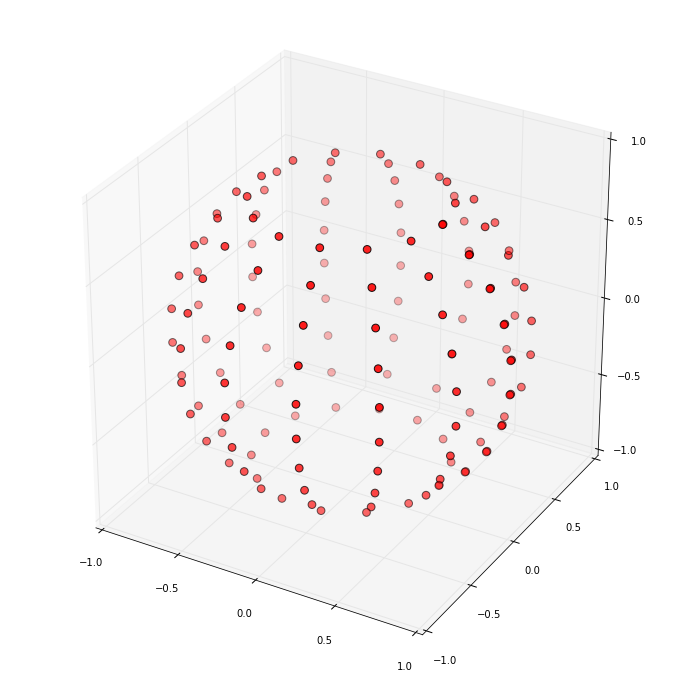

In [76]:
fig7 = plt.figure()
fig7.set_size_inches(12,12)
ax = fig7.add_subplot(111, projection='3d')
ax.scatter(input_sphere_coordinate_array[...,0],input_sphere_coordinate_array[...,1],input_sphere_coordinate_array[...,2],c='red',s=60,linewidth=1.0,alpha=0.9)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

In [84]:
#working to improve the selection of random points on the unit sphere for my unit testing, etc., to less pathological case (i.e., remove pole bias!!)
test_random_coords_on_sphere = voronoi_utility.generate_random_array_spherical_generators(4000,1.0)

In [85]:
test_random_coords_on_sphere[0:10]

array([[-0.46232822, -0.86759182,  0.18313126],
       [-0.25819432,  0.48899412, -0.83319892],
       [-0.28662818,  0.90375812, -0.31790808],
       [-0.2363103 ,  0.78704402,  0.56984133],
       [ 0.39804765,  0.83641857, -0.3767785 ],
       [ 0.02374909,  0.31747978,  0.9479676 ],
       [-0.40173819,  0.8753041 ,  0.26916382],
       [ 0.77293988,  0.44538366,  0.451882  ],
       [ 0.61905806,  0.78492307,  0.0257466 ],
       [ 0.46852946, -0.50506803, -0.72483545]])

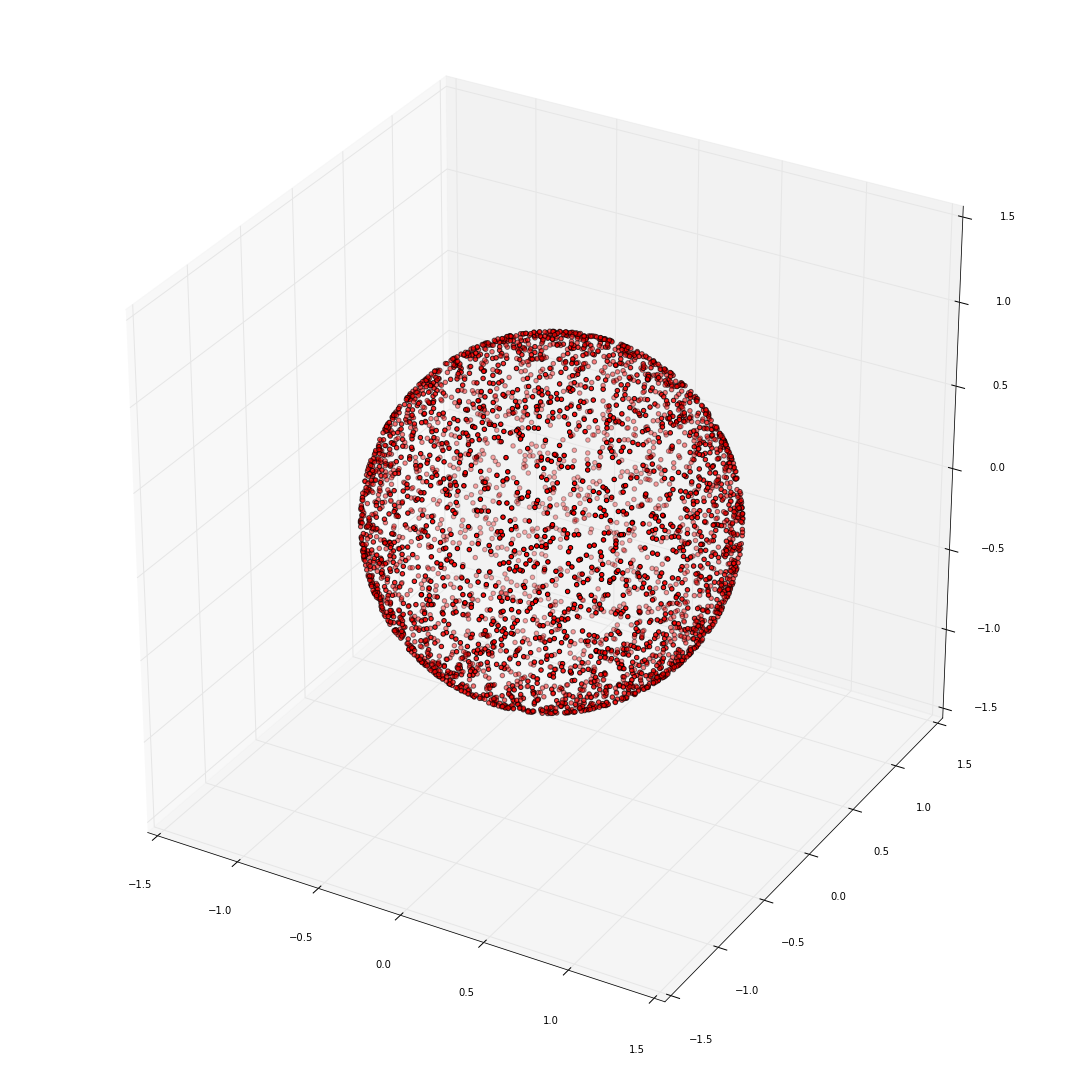

In [86]:
fig8 = plt.figure()
fig8.set_size_inches(19,19)
ax = fig8.add_subplot(111, projection='3d')
ax.scatter(test_random_coords_on_sphere[...,0],test_random_coords_on_sphere[...,1],test_random_coords_on_sphere[...,2],c='red')

In [91]:
#this looks more reasonable by visual inspection anyway
import voronoi_utility

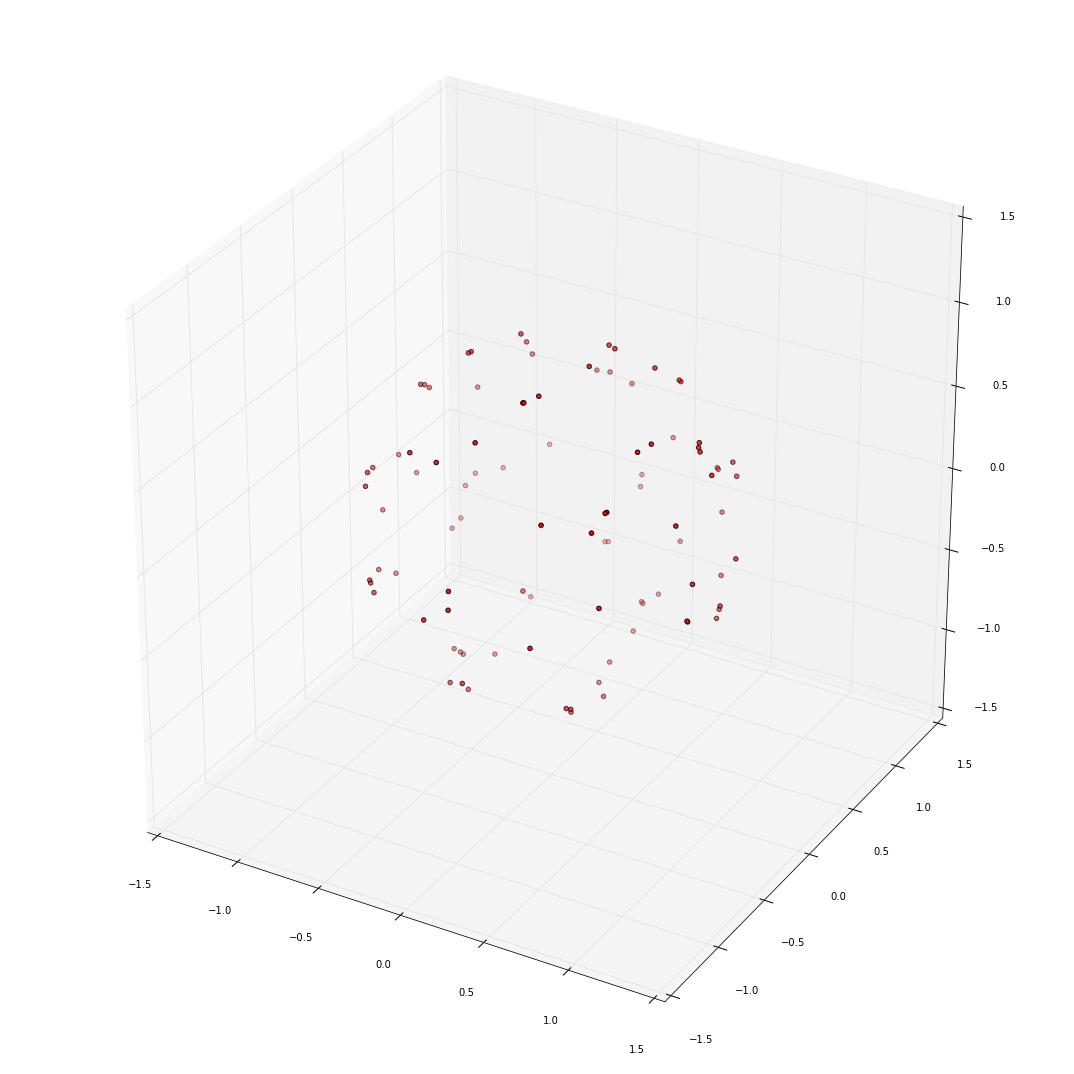

In [46]:
# trying to assess the issue preventing proper Voronoi diagram data structure generation with large sphere radii or sphere radii with many decimal places
prng_2 = numpy.random.RandomState(556)
large_sphere_radius = 1.0
cartesian_coord_array_large_radius = voronoi_utility.generate_random_array_spherical_generators(50,large_sphere_radius,prng_2)
random_dist_voronoi_instance = voronoi_utility.Voronoi_Sphere_Surface(cartesian_coord_array_large_radius,large_sphere_radius)
#dictionary_voronoi_region_vertices = random_dist_voronoi_instance.voronoi_region_vertices_spherical_surface()
facet_coordinate_array_Delaunay_triangulation = voronoi_utility.produce_triangle_vertex_coordinate_array_Delaunay_sphere(random_dist_voronoi_instance.hull_instance)
#print 'facet_coordinate_array_Delaunay_triangulation:', voronoi_utility.convert_cartesian_array_to_spherical_array(facet_coordinate_array_Delaunay_triangulation)
array_Voronoi_vertices = voronoi_utility.produce_array_Voronoi_vertices_on_sphere_surface(facet_coordinate_array_Delaunay_triangulation,large_sphere_radius,random_dist_voronoi_instance.sphere_centroid)
def spherical_distance(u,v):
    #print 'u:', voronoi_utility.convert_cartesian_array_to_spherical_array(u)
    #print 'v:', voronoi_utility.convert_cartesian_array_to_spherical_array(v)
    #dot_product = numpy.dot(u,v)
    #print 'dot_product:',dot_product
    spherical_u = voronoi_utility.convert_cartesian_array_to_spherical_array(u)
    spherical_v = voronoi_utility.convert_cartesian_array_to_spherical_array(v)
    spherical_u[0] = 1.0 #normalizing
    spherical_v[0] = 1.0
    normalized_u = voronoi_utility.convert_spherical_array_to_cartesian_array(spherical_u)
    normalized_v = voronoi_utility.convert_spherical_array_to_cartesian_array(spherical_v)
    normalized_dot_product = numpy.dot(normalized_u,normalized_v)
    #print 'normalized_dot_product:', normalized_dot_product
    spherical_distance = math.acos(normalized_dot_product)
    #print 'spherical_distance:', spherical_distance
    return spherical_distance


fig9 = plt.figure()
fig9.set_size_inches(19,19)
ax = fig9.add_subplot(111, projection='3d')
#ax.scatter(cartesian_coord_array_large_radius[...,0],cartesian_coord_array_large_radius[...,1],cartesian_coord_array_large_radius[...,2],c='red')
ax.scatter(array_Voronoi_vertices[...,0],array_Voronoi_vertices[...,1],array_Voronoi_vertices[...,2],c='red')

distance_matrix_Voronoi_vertices_to_generators = scipy.spatial.distance.cdist(array_Voronoi_vertices,cartesian_coord_array_large_radius,spherical_distance)


In [45]:
distance_matrix_Voronoi_vertices_to_generators.sort(axis=1)
for Voronoi_vertex_generator_distances in distance_matrix_Voronoi_vertices_to_generators:
    print Voronoi_vertex_generator_distances[0:5]

[ 0.39300873  0.39300873  0.39300873  0.40371148  0.42374955]
[ 0.35944917  0.35944917  0.35944917  0.39266285  0.56853184]
[ 0.31767752  0.31767752  0.31767752  0.51769914  0.82013499]
[ 0.46523859  0.46523859  0.46523859  0.59924043  0.66456415]
[ 0.55263489  0.55263489  0.55263489  0.61610348  0.63059547]
[ 0.37101463  0.37101463  0.37101463  0.3865098   0.65877482]
[ 0.40436468  0.40436468  0.40436468  0.46711492  0.56578136]
[ 0.25173723  0.25173723  0.25173723  0.42434607  0.54613719]
[ 0.39011454  0.39011454  0.39011454  0.42813428  0.43636739]
[ 0.10812033  0.10812033  0.10812033  0.46231734  0.52155696]
[ 0.31116015  0.31116015  0.31116015  0.41364399  0.43317231]
[ 0.55875526  0.55875526  0.55875526  0.63746426  0.64467896]
[ 0.33764806  0.33764806  0.33764806  0.43086644  0.46177352]
[ 0.28618995  0.28618995  0.28618995  0.40451276  0.45789433]
[ 0.58249837  0.58249837  0.58249837  0.59768207  0.59880257]
[ 0.5813974   0.5813974   0.5813974   0.59156372  0.59816389]
[ 0.4258

Some of the above distance arrays are reasonable (3 equidistant generators) while others have a single closest generator, which shouldn't happen for a proper Voronoi diagram. Could this be sensitive to distances being calculated using a Euclidean metric rather than the true spherical surface metric?!

In [31]:
-2.95 + 3.14

0.18999999999999995

In [10]:
#more debugging
prng_2 = numpy.random.RandomState(556)
large_sphere_radius = 1.0
cartesian_coord_array_large_radius = voronoi_utility.generate_random_array_spherical_generators(500,large_sphere_radius,prng_2)
random_dist_voronoi_instance = voronoi_utility.Voronoi_Sphere_Surface(cartesian_coord_array_large_radius,large_sphere_radius)
dictionary_surface_areas = random_dist_voronoi_instance.voronoi_region_surface_areas_spherical_surface()
sum(dictionary_surface_areas.itervalues()) / (4 * math.pi * (large_sphere_radius**2))

0.96429087482093701

In [14]:
sphere_radius = 87.0
coordinates_on_sphere_1 = numpy.array([[0,0,1],[1,0,0]]) * sphere_radius
voronoi_utility.calculate_haversine_distance_between_spherical_points(coordinates_on_sphere_1[0],coordinates_on_sphere_1[1],sphere_radius)


lambda_1: 0.0
lambda_2: 1.57079632679
phi_1: 0.0
phi_2: 0.0
spherical_distance: 136.659280431


136.659280431156